In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
sns.set(style='whitegrid')

In [5]:
import matplotlib.pyplot as plt

In [6]:
from collections import Counter

In [7]:
%matplotlib inline

In [8]:
import os

In [9]:
fifa19 = pd.read_csv(r'C:\Users\arnav\Downloads\FIFA.csv')

In [10]:
fifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [19]:
fifa19.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [21]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [22]:
fifa19['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

In [23]:
f, ax = plt.subplots(figsize=(8,6))

In [24]:
x=fifa19['Age']

In [25]:
ax=sns.distplot(x,bins=10)

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\349202741.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x,bins=10)


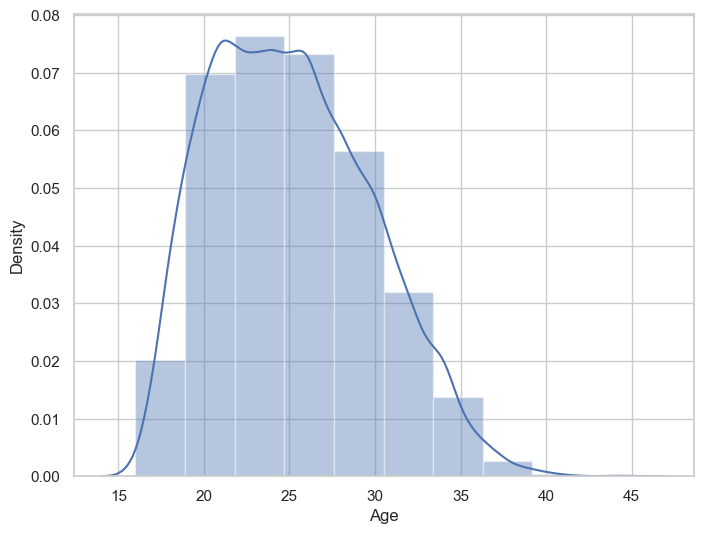

In [26]:
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\230166250.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x,bins=10)


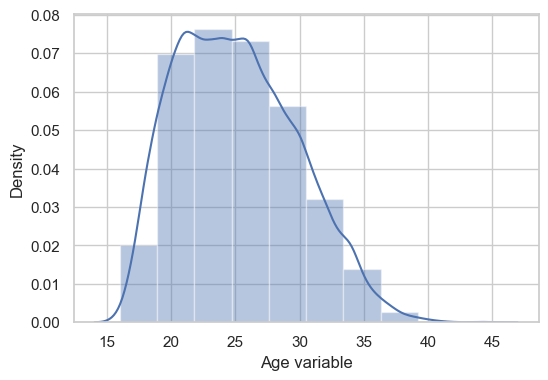

In [27]:
f, ax= plt.subplots(figsize=(6,4))
x=fifa19['Age']
x=pd.Series(x,name="Age variable")
ax=sns.distplot(x,bins=10)
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\1669656667.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x,bins=10,vertical= True)


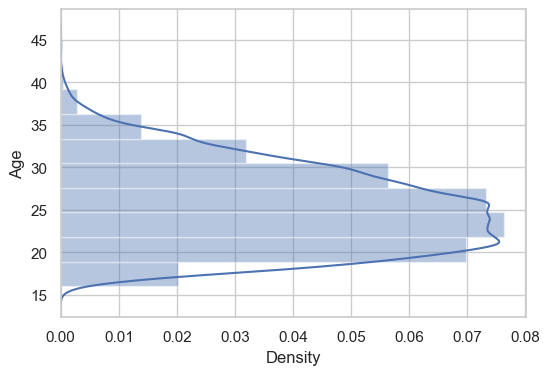

In [28]:
f, ax= plt.subplots(figsize=(6,4))
x=fifa19['Age']

ax=sns.distplot(x,bins=10,vertical= True)
plt.show()

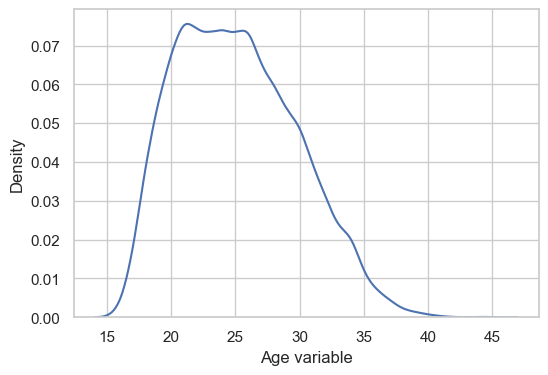

In [29]:
f, ax= plt.subplots(figsize=(6,4))
x=fifa19['Age']
x=pd.Series(x,name="Age variable")
ax=sns.kdeplot(x)
plt.show()

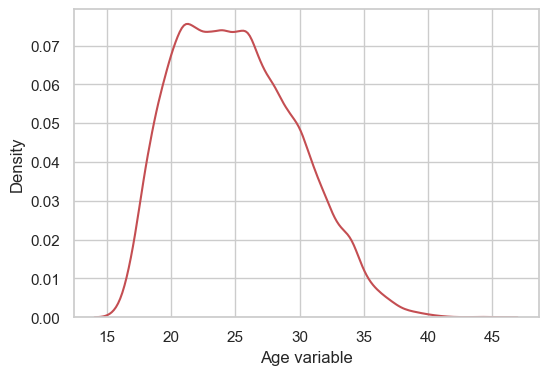

In [30]:
f, ax= plt.subplots(figsize=(6,4))
x=fifa19['Age']
x=pd.Series(x,name="Age variable")
ax=sns.kdeplot(x,color='r')
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\1753087002.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x,kde=False,rug=True,color='r',bins=10)


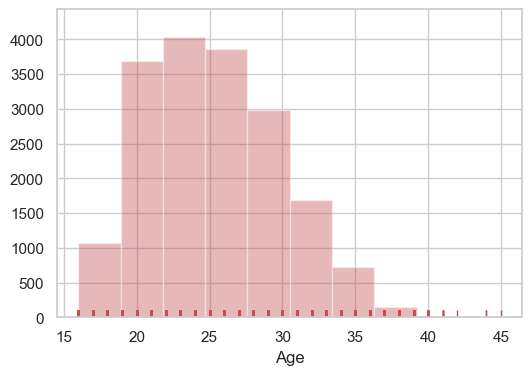

In [32]:
f, ax= plt.subplots(figsize=(6,4))
x=fifa19['Age']

ax=sns.distplot(x,kde=False,rug=True,color='r',bins=10)
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\3567583688.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x,hist=False,rug=True,color='r',bins=10)


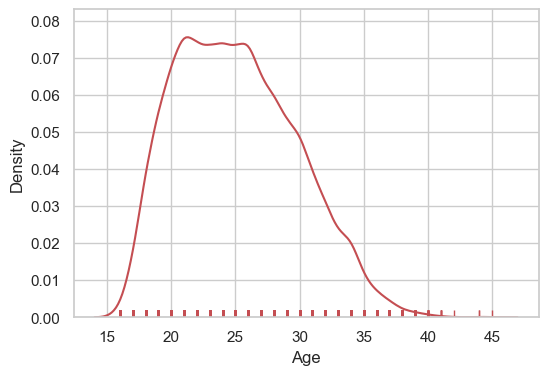

In [34]:
f, ax= plt.subplots(figsize=(6,4))
x=fifa19['Age']

ax=sns.distplot(x,hist=False,rug=True,color='r',bins=10)
plt.show()

In [35]:
fifa19['Preferred Foot'].nunique()

2

In [36]:
fifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [37]:
fifa19['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

In [39]:
fifa19['Club'].value_counts()

Club
FC Barcelona                 33
Valencia CF                  33
Fortuna Düsseldorf           33
Cardiff City                 33
Rayo Vallecano               33
                             ..
América FC (Minas Gerais)    20
Fluminense                   20
Sligo Rovers                 19
Limerick FC                  19
Derry City                   18
Name: count, Length: 651, dtype: int64

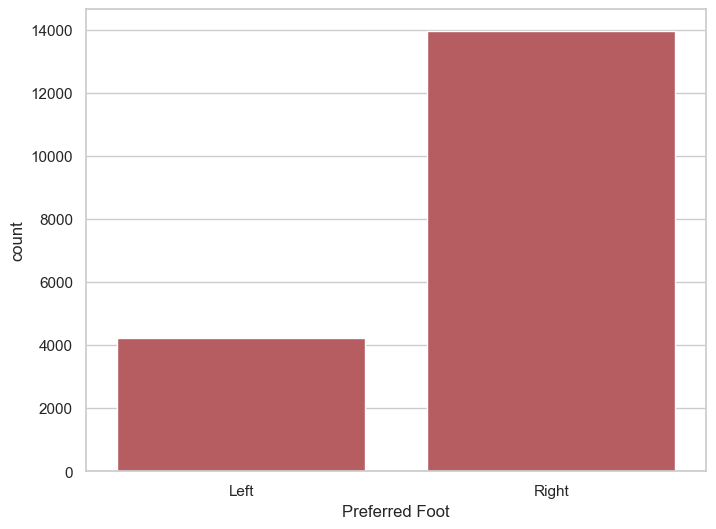

In [41]:
f, ax = plt .subplots(figsize=(8,6))
sns.countplot(x="Preferred Foot",data=fifa19,color='r')
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\741422646.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(x="Preferred Foot",hue="Real Face",data=fifa19,color='r')


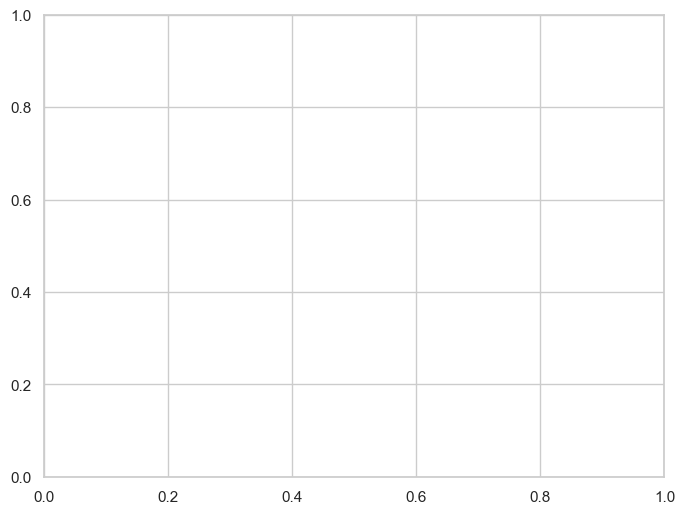

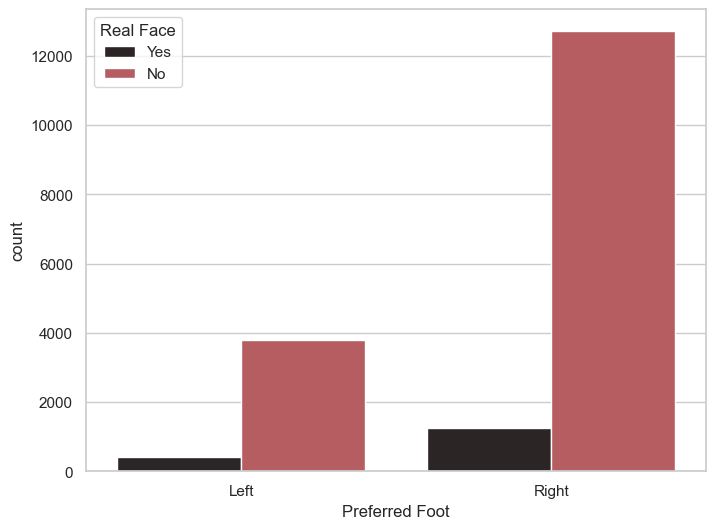

In [43]:
f, ax = plt .subplots(figsize=(8,6))
sns.countplot(x="Preferred Foot",hue="Real Face",data=fifa19,color='r')
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\1203834455.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(y="Preferred Foot",hue="Real Face",data=fifa19,color='r')


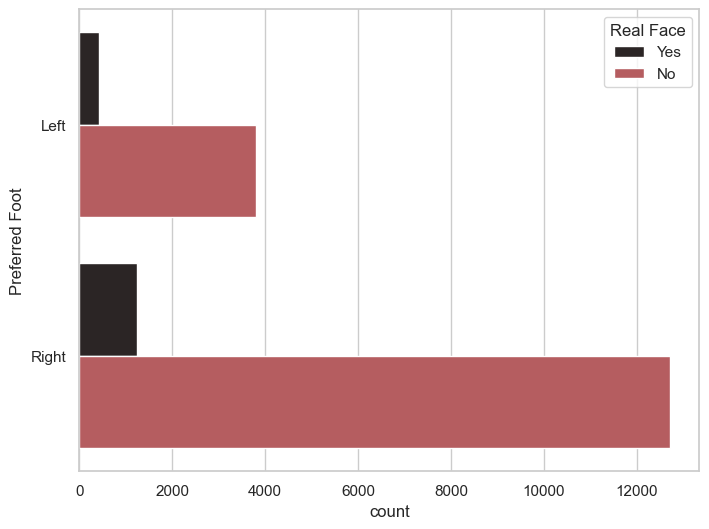

In [44]:
f, ax = plt .subplots(figsize=(8,6))
sns.countplot(y="Preferred Foot",hue="Real Face",data=fifa19,color='r')
plt.show()

In [51]:
g=sns.catplot(x='Preferred Foot',kind="count",palette="ch:.25",data=fifa19)

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\1564223490.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(x='Preferred Foot',kind="count",palette="ch:.25",data=fifa19)


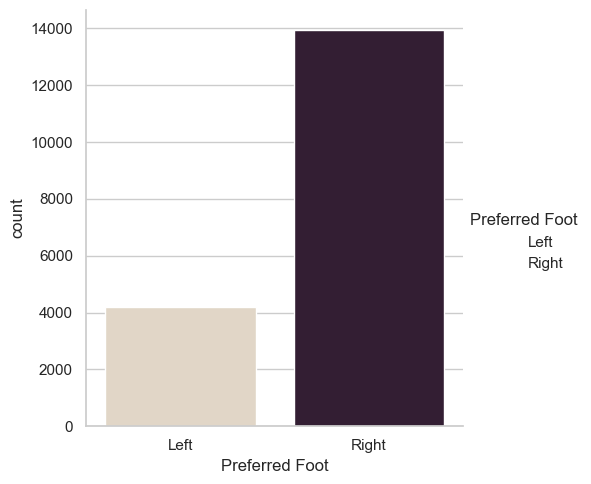

In [52]:
plt.show()

In [53]:
fifa19['International Reputation'].nunique()

5

In [56]:
fifa19['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

In [55]:
fifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


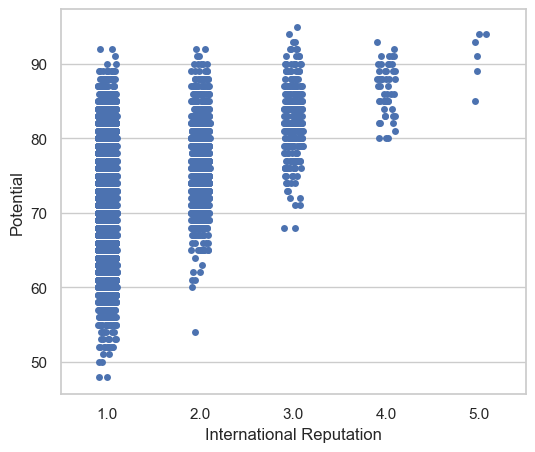

In [58]:
f,ax = plt.subplots(figsize=(6,5))
sns.stripplot(x="International Reputation",y='Potential',data=fifa19)
plt.show()

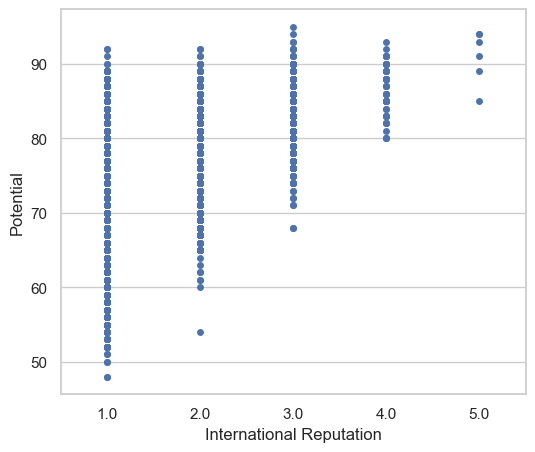

In [60]:
f,ax = plt.subplots(figsize=(6,5))
sns.stripplot(x="International Reputation",y='Potential',data=fifa19,jitter=0.0)
plt.show()

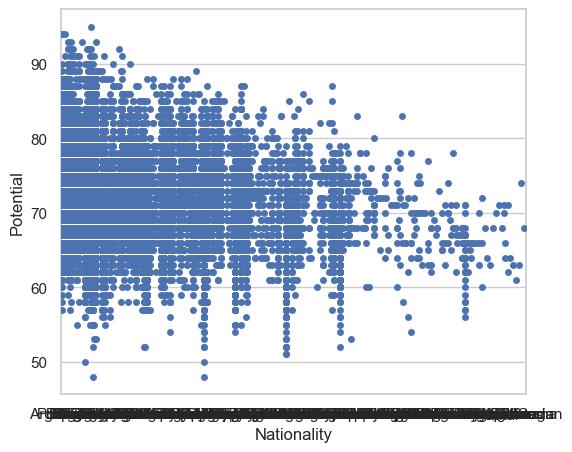

In [61]:
f,ax = plt.subplots(figsize=(6,5))
sns.stripplot(x="Nationality",y='Potential',data=fifa19)
plt.show()

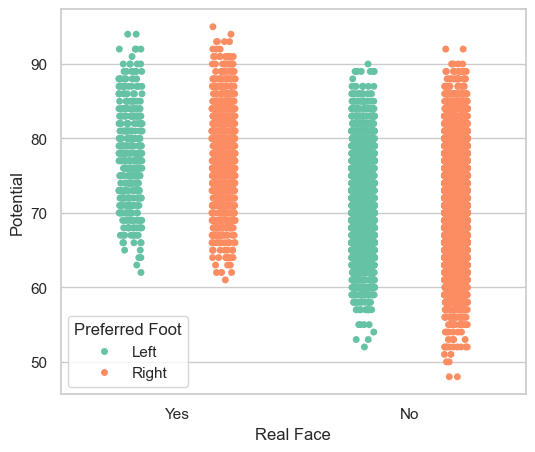

In [65]:
f,ax = plt.subplots(figsize=(6,5))
sns.stripplot(x="Real Face",y='Potential',hue="Preferred Foot",palette="Set2",data=fifa19,dodge=True)
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_7808\1038392879.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="Real Face",y='Potential',hue="Preferred Foot",palette="Set2",data=fifa19,dodge= True, edgecolor="gray",alpha=.25,marker='D',size=20)


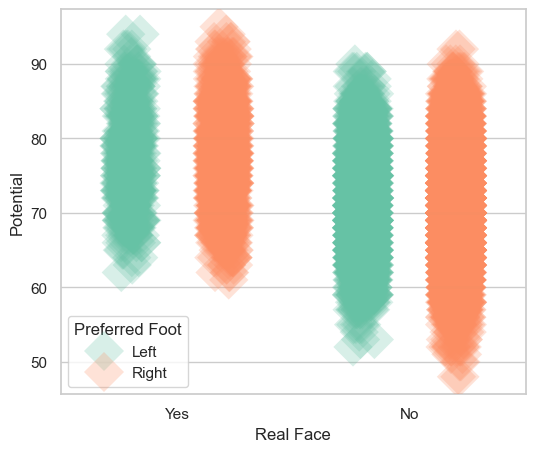

In [69]:
f,ax = plt.subplots(figsize=(6,5))
sns.stripplot(x="Real Face",y='Potential',hue="Preferred Foot",palette="Set2",data=fifa19,dodge= True, edgecolor="gray",alpha=.25,marker='D',size=20)
plt.show()

In [11]:
fifa19["Potential"]

0        94
1        94
2        93
3        93
4        92
         ..
18202    65
18203    63
18204    67
18205    66
18206    66
Name: Potential, Length: 18207, dtype: int64

In [12]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=fifa19["Potential"])

<Axes: xlabel='Potential'>

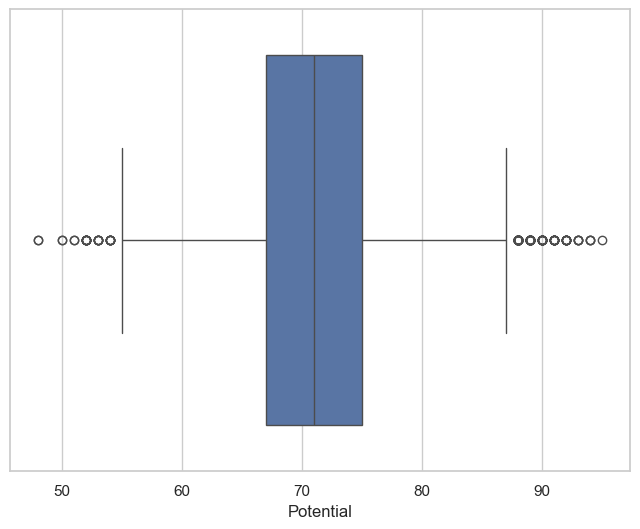

In [13]:
plt.show()

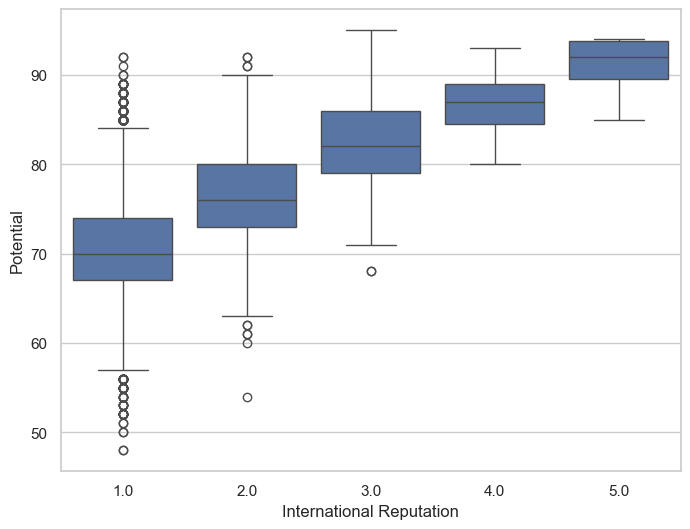

In [14]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x="International Reputation",y="Potential",data=fifa19)
plt.show()

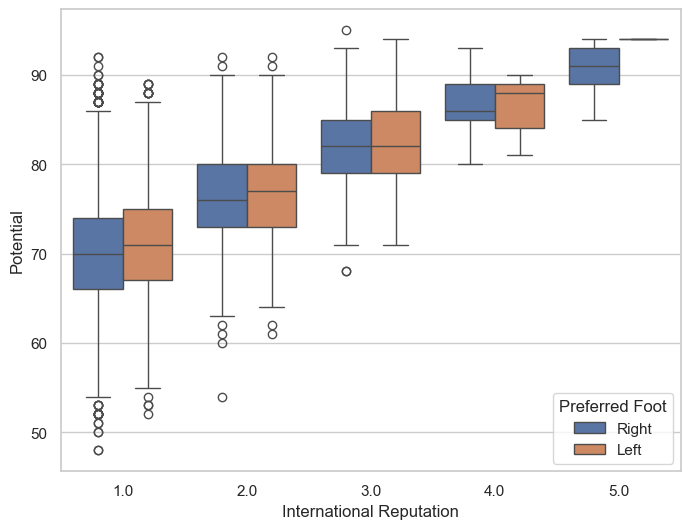

In [15]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19)
plt.show()

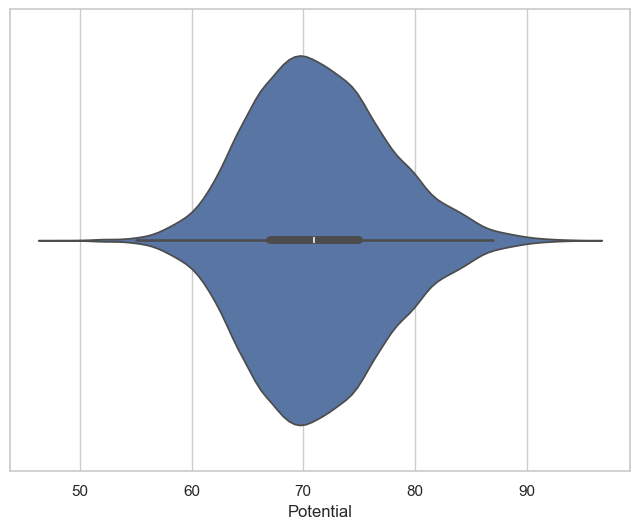

In [16]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x=fifa19["Potential"])
plt.show()

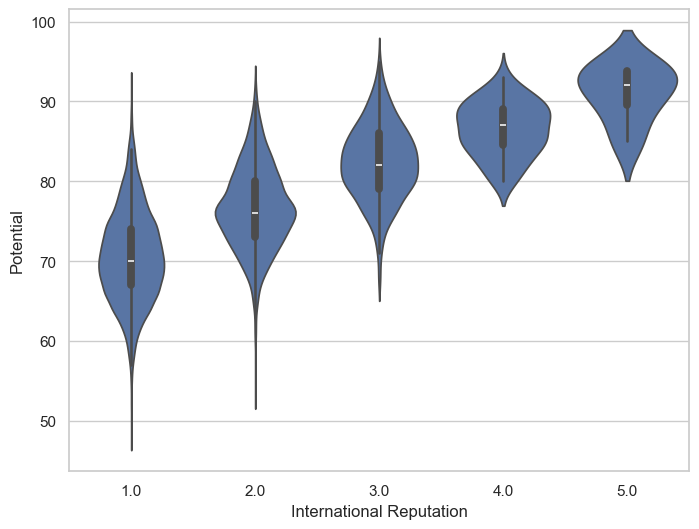

In [17]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x=fifa19["International Reputation"],y=fifa19["Potential"])
plt.show()

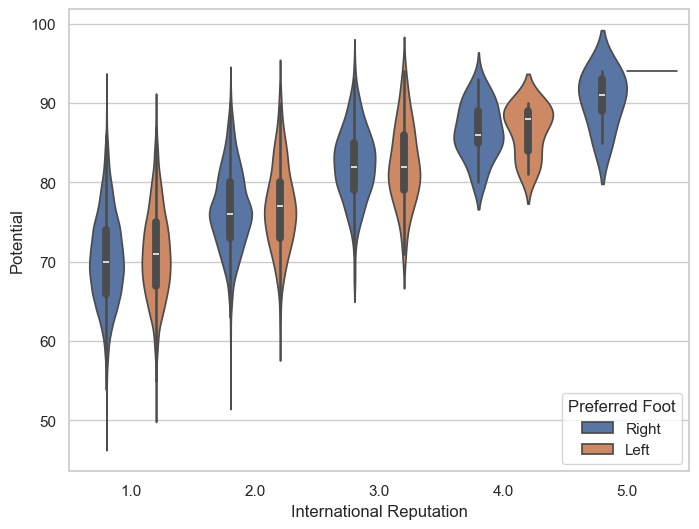

In [20]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19)
plt.show()

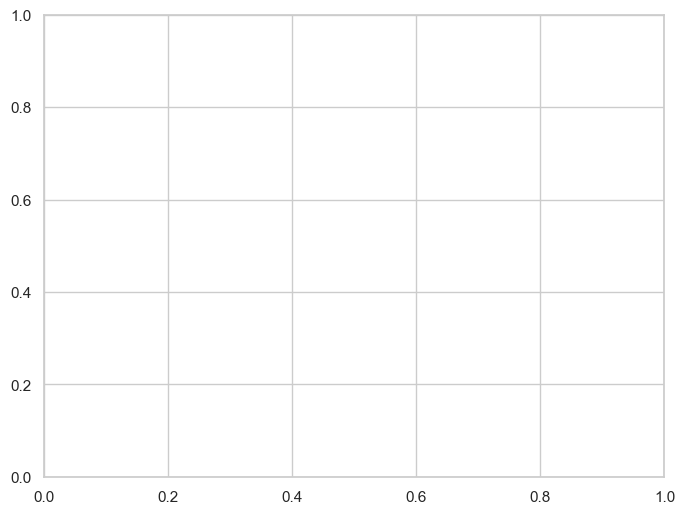

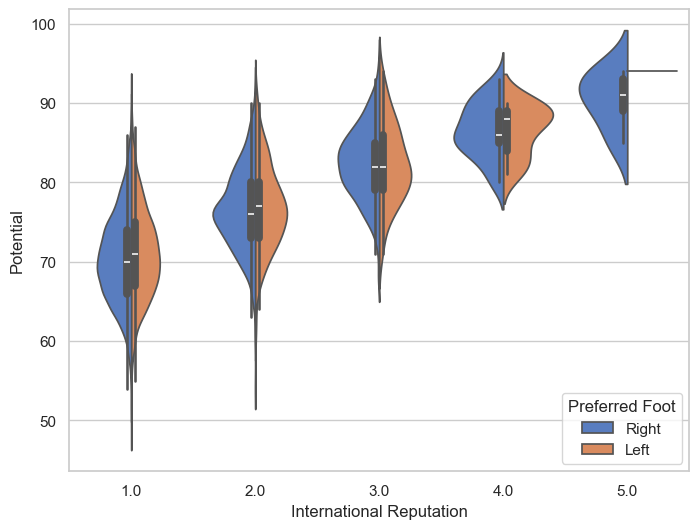

In [22]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19,palette="muted",split=True)
plt.show()

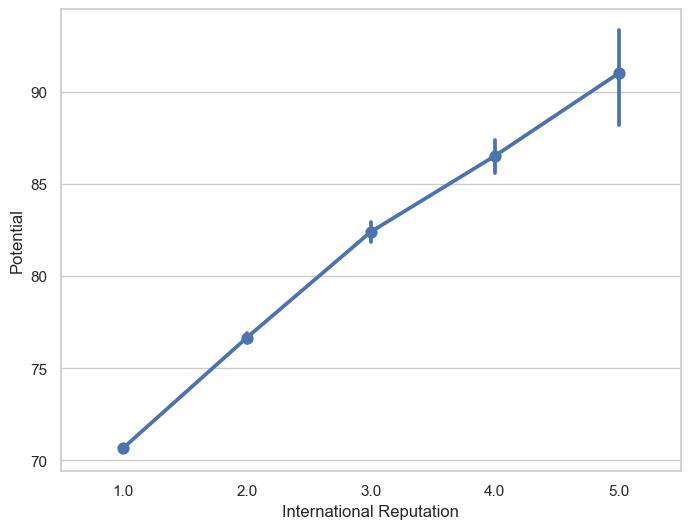

In [23]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x="International Reputation",y="Potential",data=fifa19)
plt.show()

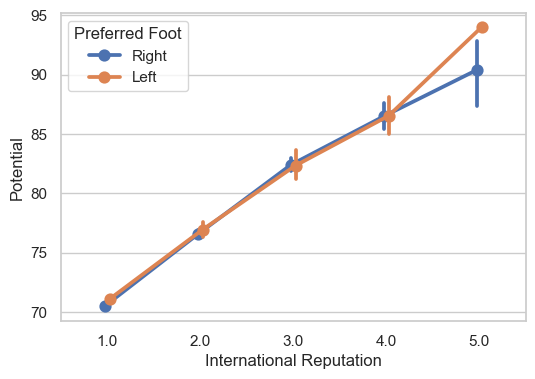

In [27]:
f,ax=plt.subplots(figsize=(6,4))
sns.pointplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19,dodge=True)
plt.show()

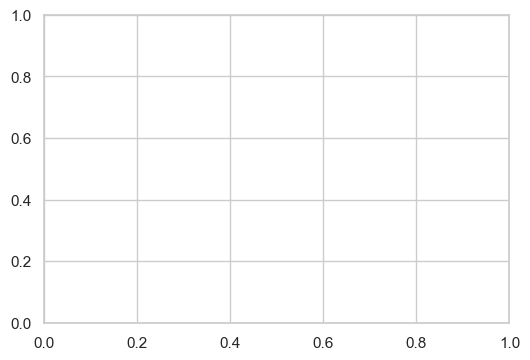

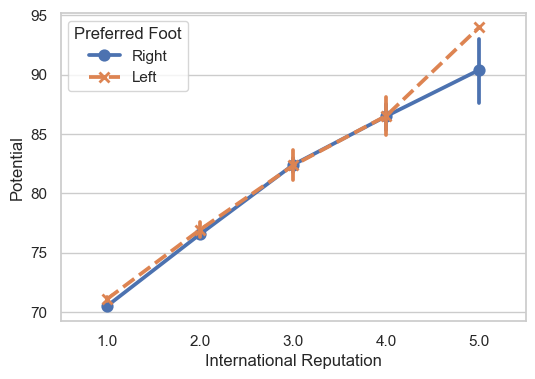

In [29]:
f,ax=plt.subplots(figsize=(6,4))
sns.pointplot(x="International Reputation",y="Potential",hue="Preferred Foot",markers=["o","x"],linestyles=["-","--"],data=fifa19)
plt.show()

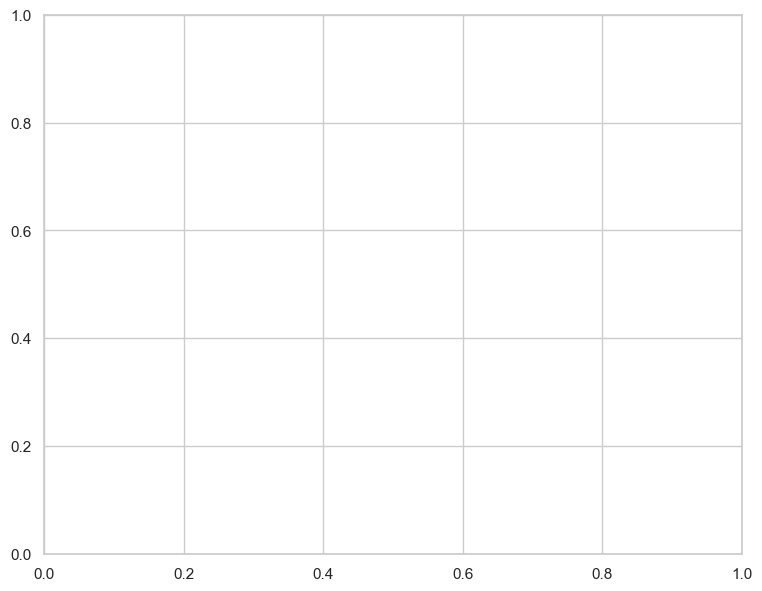

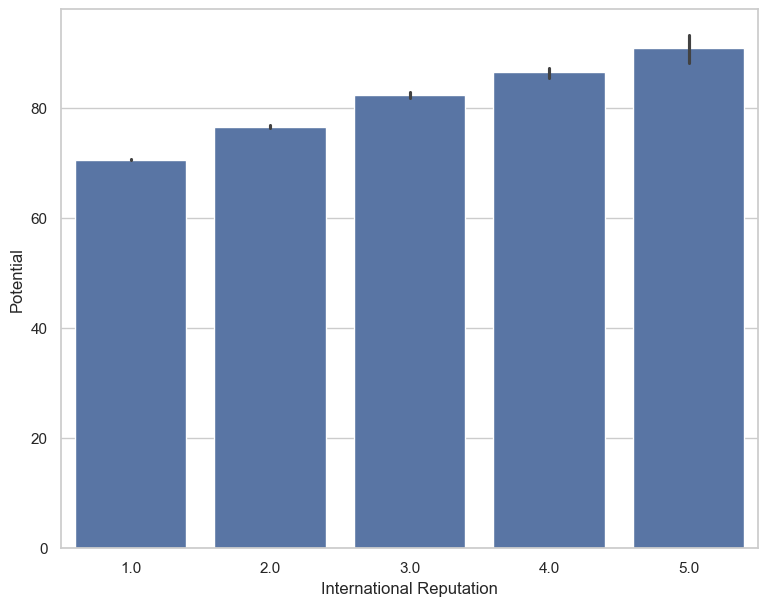

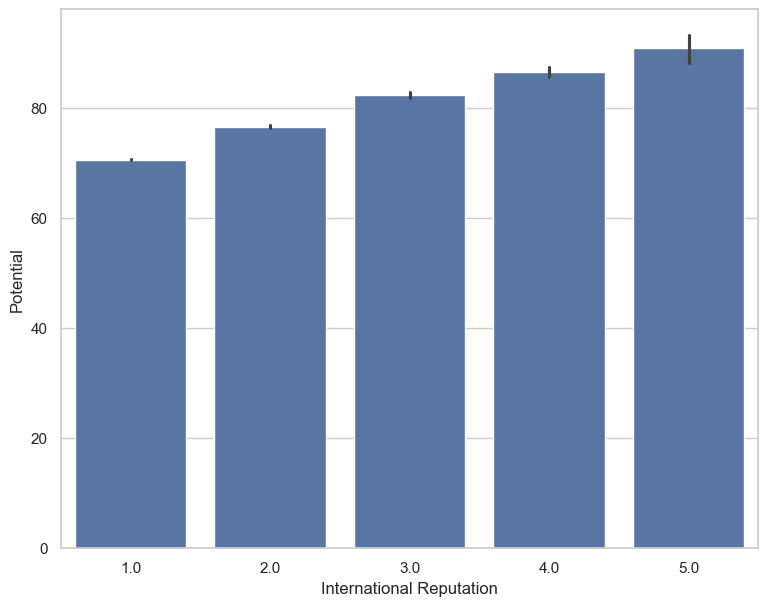

In [32]:
f,ax=plt.subplots(figsize=(9,7))
sns.barplot(x="International Reputation",y="Potential",data=fifa19)
plt.show()

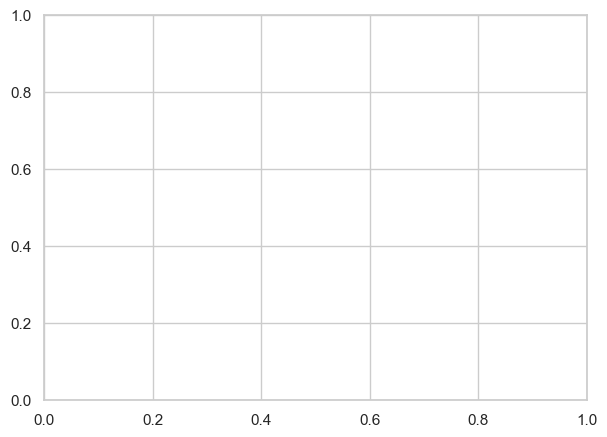

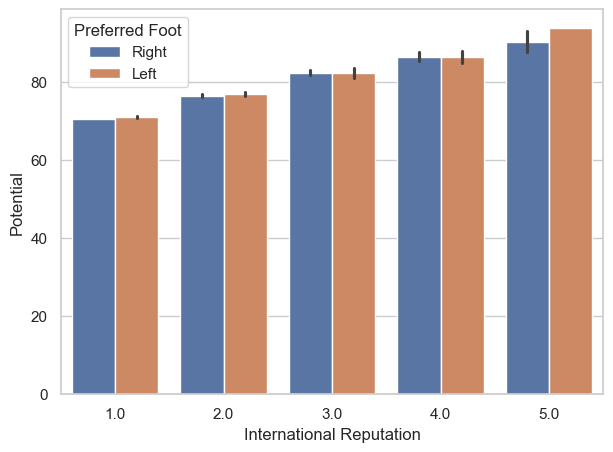

In [34]:
f,ax=plt.subplots(figsize=(7,5))
sns.barplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19)
plt.show()

In [35]:
from numpy import median 

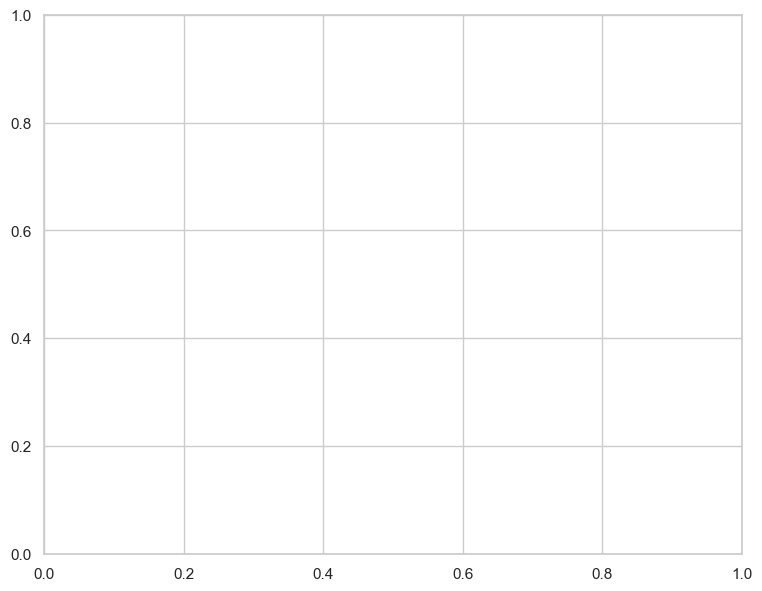

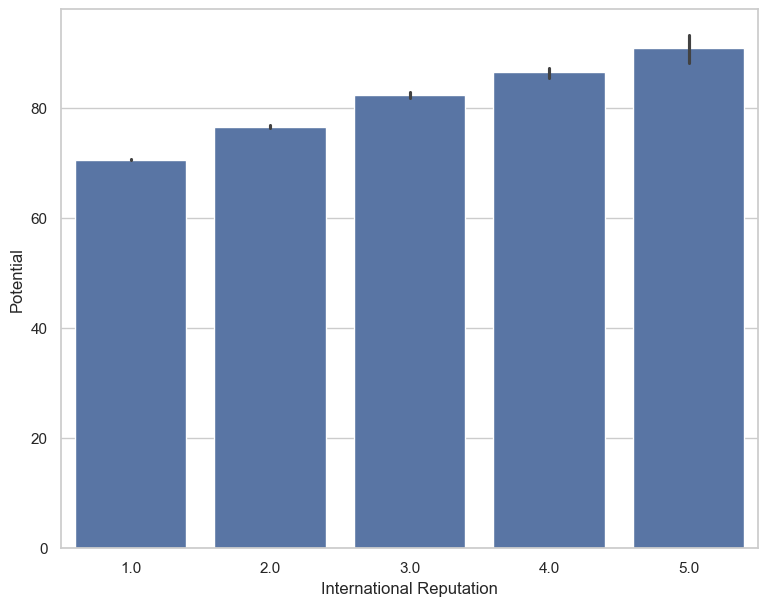

In [38]:
f,ax=plt.subplots(figsize=(9,7))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,estimator="mean")
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_9280\3562081505.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 70)` for the same effect.

  sns.barplot(x="International Reputation",y="Potential",data=fifa19,ci=70)


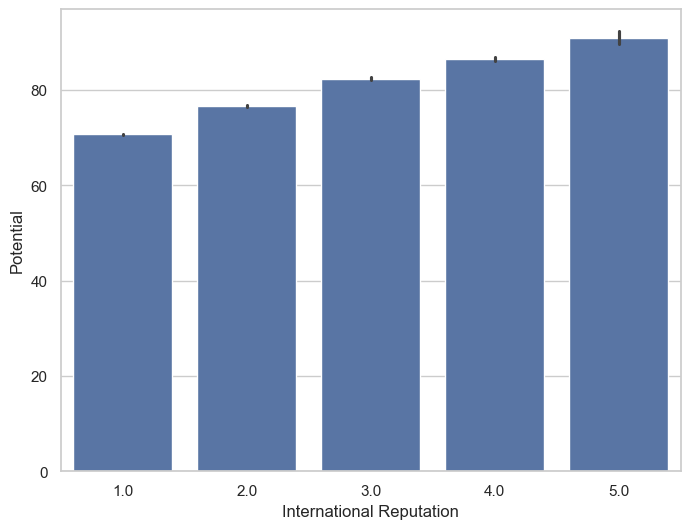

In [42]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,ci=70)
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_9280\3511229645.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="International Reputation",y="Potential",data=fifa19,ci="sd")


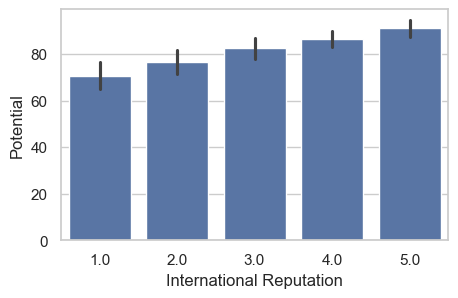

In [43]:
f,ax=plt.subplots(figsize=(5,3))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,ci="sd")
plt.show()

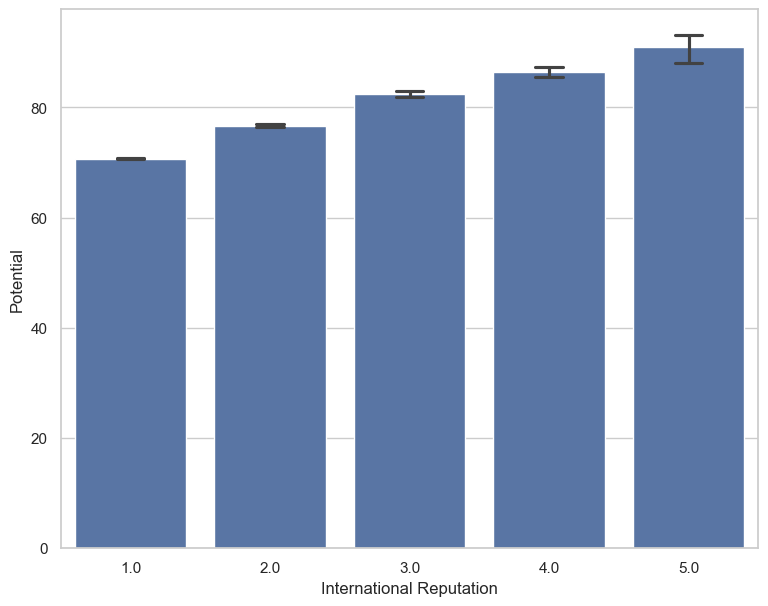

In [44]:
f,ax=plt.subplots(figsize=(9,7))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,capsize=0.2)
plt.show()